In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("pokemon.csv")
print(df.shape)
df.head(5)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [47]:
df_types = df.melt(id_vars=["id", "species"], 
                   value_vars=["type_1", "type_2"],
                  var_name="type_level",
                  value_name="type")
df_types.head(5)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [48]:
type_count = df_types.type.value_counts()
type_count

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [49]:
type_index = type_count.index
type_index

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'fire', 'ground', 'rock', 'fighting', 'electric', 'steel', 'fairy',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

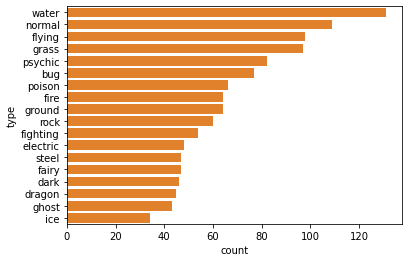

In [50]:
base = sns.color_palette()[1]
sns.countplot(data=df_types, y="type", color=base, order=type_index);

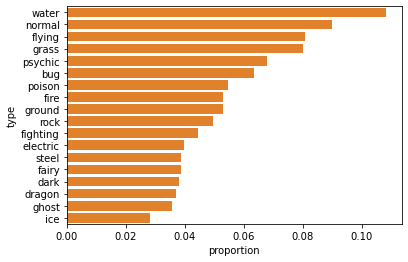

In [62]:
#Find the maximum proportion of bar
n_pokemon = type_count.sum()
max_prop = type_count[0]/n_pokemon

#Create an array of evenly spaced proportioned values
tick_props = np.arange(0, max_prop, 0.02)

#Create a list of string values that can be used as tick labels
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

#Plot the chart
sns.countplot(data=df_types, y="type", color=base, order=type_index);
#Change axis
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel("proportion");

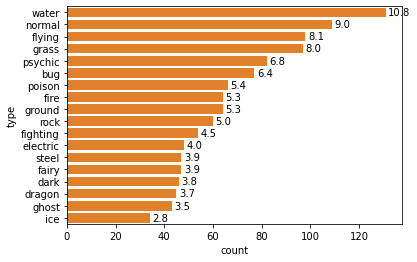

In [71]:
#Print text proportion on the bars of a horizontal plot
sns.countplot(data=df_types, y="type", color=base, order=type_index);

#Logit to print the proportion text on the bars
for i in range(type_count.shape[0]):
    count = type_count[i]
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va='center')
    

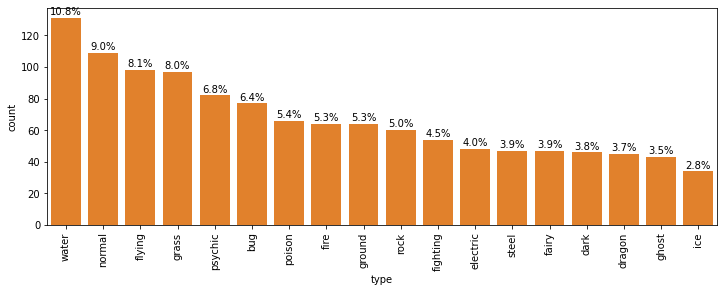

In [87]:
#Print text proportion on the bars of a horizontal plot
sns.countplot(data=df_types, x="type", color=base, order=type_index)
rcParams['figure.figsize'] = 12,4;

#get the current tick location and labels
locs, labels = plt.xticks(rotation=90)

#Logit to print the proportion text on the bars
for loc, label in zip(locs,labels):
    count = type_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(loc, count+2, pct_string, ha='center')
    
from matplotlib import rcParams



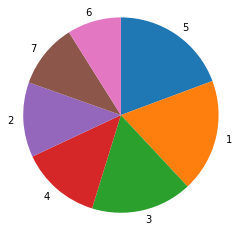

In [90]:
# Use the same pokemon dataset
sorted_counts = df['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

# We have the used option `Square`. 
# Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
plt.axis('square');

(-1.1063354030102694,
 1.1197837798494124,
 -1.114763917050899,
 1.1113552658087829)

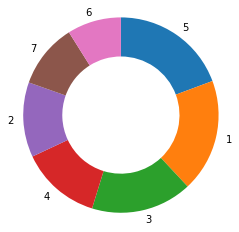

In [92]:
sorted_counts = df['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')